# Assignment 5

## Part A

### In this part I am simply compiling the code using cython without doing any changes like variable declarations etc.

In [101]:
# using cython (the following code is identical to the previous on)
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [102]:
%%cython
import numpy as np

import numpy as np
import scipy.sparse as ss
import scipy.sparse.linalg as ssl
from itertools import product


def set_boundary_values(n):
    b = np.zeros((4,n))
    b[2]=1
    b[3]=1
    return(b)
    
def build_matrix_and_vector(m,b):
    
    length = (m-2)**2
    f_length = m-2
    
    M = np.zeros(((m-2)**2,(m-2)**2))
    y = np.zeros(((m-2)**2,1))
                
    for i in range(length):
        M[i,i] = -4
    
    locations = product(range(1, f_length+1), range(1, f_length+1))
          
    for k in range(length):
        for (i, j) in locations:
#         for i in range(1,f_length+1):
#             for j in range(1,f_length+1):

            if j-1 != 0:
                M[k, k-1] = 1
            else:
                y[k,0] -= b[3,i]   

            if j+1 != (f_length+1):
                M[k, k+1] = 1
            else:
                y[k,0] -= b[2,i]

            if i-1 != 0:
                M[k, k - (m-2)] = 1
            else:
                y[k,0] -= b[0,j]

            if i+1 != (f_length+1):
                M[k, k + (m-2)] = 1
            else:
                y[k,0] -= b[1,j]   


            break
            

            
    #return(M,y)  # not sparce
    return(ss.csr_matrix(M),y)
            
    
def solve_heat_equation1(n):
    b = set_boundary_values(n)
    M,y = build_matrix_and_vector(n,b)
    #f = np.linalg.solve(M,y)        # not sparse
    f = ssl.spsolve(M,y)
    G = np.zeros((n,n)) 
    G[1:n-1,1:n-1]=f.reshape(n-2,n-2) 
    G[0,:]=b[0]
    G[n-1,:]=b[1]
    G[:,n-1]=b[2]
    G[:,0]=b[3]
    return(G)

In [103]:
import time
t0 = time.time()

G = solve_heat_equation1(100)

t1 = time.time()
total = t1-t0
print (total)

2.0439743995666504


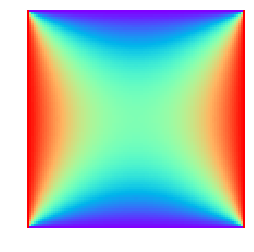

In [104]:
import matplotlib.pyplot as plt

img=plt.imshow(G)
img.set_cmap('rainbow')
plt.axis('off')
plt.show()

In [105]:
%prun G = solve_heat_equation1(100)

## Part B

### In this version I have changed the variables and arrays with ctypes using the command cdef. I have made the changes wherever possible and have provided the variable types everywhere possible

In [106]:
%%cython
import numpy as np

import numpy as np
cimport numpy as np
import scipy.sparse as ss
import scipy.sparse.linalg as ssl
from itertools import product

def set_boundary_values(int n):
    cdef np.ndarray b = np.zeros((4,n), dtype=float)
    
    b[2]=1
    b[3]=1
    return(b)
    
def build_matrix_and_vector(int m, np.ndarray b):

# declaring the variables like we do in C
    cdef int length
    cdef int f_length
    cdef int i
    cdef int j
    cdef int k

#declaring arrays    
    cdef np.ndarray M = np.zeros(((m-2)**2,(m-2)**2), dtype=float)
    cdef np.ndarray y = np.zeros(((m-2)**2,1), dtype=float)
    
    
    length = (m-2)**2
    f_length = m-2
    
                
    for i in range(length):
        M[i,i] = -4
    
    locations = product(range(1, f_length+1), range(1, f_length+1))
          
    for k in range(length):
        for (i, j) in locations:
#         for i in range(1,f_length+1):
#             for j in range(1,f_length+1):

            if j-1 != 0:
                M[k, k-1] = 1
            else:
                y[k,0] -= b[3,i]   

            if j+1 != (f_length+1):
                M[k, k+1] = 1
            else:
                y[k,0] -= b[2,i]

            if i-1 != 0:
                M[k, k - (m-2)] = 1
            else:
                y[k,0] -= b[0,j]

            if i+1 != (f_length+1):
                M[k, k + (m-2)] = 1
            else:
                y[k,0] -= b[1,j]   


            break


            
    #return(M,y)  # not sparce
    return(ss.csr_matrix(M),y)
            
    
def solve_heat_equation2(int n):
    
    cdef np.ndarray b = set_boundary_values(n)
    
    
    
    M,y = build_matrix_and_vector(n,b)
    #f = np.linalg.solve(M,y)        # not sparse
    cdef np.ndarray f = ssl.spsolve(M,y)
    cdef np.ndarray G = np.zeros([n,n], dtype = float) 
    
    G[1:n-1,1:n-1]=f.reshape(n-2,n-2) 
    G[0,:]=b[0]
    G[n-1,:]=b[1]
    G[:,n-1]=b[2]
    G[:,0]=b[3]
    return(G)

In [107]:
import time
t0 = time.time()

G = solve_heat_equation2(100)

t1 = time.time()
total = t1-t0
print (total)

2.048640251159668


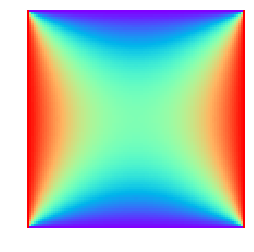

In [108]:
import matplotlib.pyplot as plt

img=plt.imshow(G)
img.set_cmap('rainbow')
plt.axis('off')
plt.show()

In [109]:
%prun G = solve_heat_equation2(100)

## Part C

### In this part I have given the content of ndarray objects so that I can effeiciently access the data buffer of the arrays

In [110]:
%%cython
import numpy as np
import numpy as np
cimport numpy as np
import scipy.sparse as ss
import scipy.sparse.linalg as ssl
from itertools import product


def set_boundary_values(int n):   #declaring varible type in function defination
    cdef np.ndarray[double, ndim=2] b = np.zeros((4,n), dtype=float)
    
    b[2]=1
    b[3]=1
    return(b)
    
def build_matrix_and_vector(int m, np.ndarray b):
    
#declaring varibles and there type like we do in C
    cdef int length
    cdef int f_length
    cdef int i
    cdef int j
    cdef int k

# Typing the content of ndarray objects to make the code run more effieciently
    cdef np.ndarray[double, ndim=2] M = np.zeros(((m-2)**2,(m-2)**2), dtype=float)
    cdef np.ndarray[double, ndim=2] y = np.zeros(((m-2)**2,1), dtype=float)
    
    
    length = (m-2)**2
    f_length = m-2
    
                
    for i in range(length):
        M[i,i] = -4
    
    locations = product(range(1, f_length+1), range(1, f_length+1))
          
    for k in range(length):
        for (i, j) in locations:
#         for i in range(1,f_length+1):
#             for j in range(1,f_length+1):

            if j-1 != 0:
                M[k, k-1] = 1
            else:
                y[k,0] -= b[3,i]   

            if j+1 != (f_length+1):
                M[k, k+1] = 1
            else:
                y[k,0] -= b[2,i]

            if i-1 != 0:
                M[k, k - (m-2)] = 1
            else:
                y[k,0] -= b[0,j]

            if i+1 != (f_length+1):
                M[k, k + (m-2)] = 1
            else:
                y[k,0] -= b[1,j]   


            break


            
    #return(M,y)  # not sparce
    return(ss.csr_matrix(M),y)
            
    
def solve_heat_equation3(int n):

# Typing the content of ndarray objects to make the code run more effieciently

    cdef np.ndarray[double, ndim=2] b = set_boundary_values(n)
    
    
    
    M,y = build_matrix_and_vector(n,b)
    #f = np.linalg.solve(M,y)        # not sparse

# Typing the content of ndarray objects to make the code run more effieciently    
    
    cdef np.ndarray[double, ndim=1] f = ssl.spsolve(M,y)
    cdef np.ndarray[double, ndim=2] G = np.zeros([n,n], dtype = float) 
    
    G[1:n-1,1:n-1]=f.reshape(n-2,n-2) 
    G[0,:]=b[0]
    G[n-1,:]=b[1]
    G[:,n-1]=b[2]
    G[:,0]=b[3]
    return(G)

In [111]:
import time
t0 = time.time()

G = solve_heat_equation3(100)

t1 = time.time()
total = t1-t0
print (total)

2.023729085922241


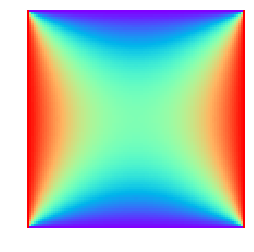

In [112]:
import matplotlib.pyplot as plt

img=plt.imshow(G)
img.set_cmap('rainbow')
plt.axis('off')
plt.show()

In [113]:
%prun G = solve_heat_equation3(100)